# Implementing Model Description Format for Newton's Law of Cooling




<p id="1-newtons-law-of-cooling-process-model-introduction">

## 1. Newton's Law of Cooling Process Model: Introduction

In this notebook, a simple Newtonian cooling process model is implemented using the MDF library. The model simulates the cooling of an object to the ambient temperature over time.

Newton's Law of Cooling is expressed by the differential equation:
$$
\frac{dT}{dt} = -k(T - T_{\text{ambient}})
$$
The temperature of the object is denoted by $T$,\
The ambient temperature is denoted by $T_{\text{ambient}}$,\
The cooling coefficient is represented by $k$,\
The rate of change of the temperature over time is given by $\frac{dT}{dt}$.\
<img src="attachment:6c8bd64d-a906-484c-9b32-6eb12d5f3b1d.png" width="300">


In [1]:
!pip install modeci_mdf

In [2]:
from modeci_mdf.mdf import Model, Graph, Node, Parameter, OutputPort, Function, InputPort

## 2. Creating the Model and Graph
First, we initialize the model and a graph to hold our computational nodes.

In [3]:
mod = Model(id="NewtonCoolingModel")
mod_graph = Graph(id="cooling_process")
mod.graphs.append(mod_graph)

### 2.1 Defining Nodes and Parameters
We define a single node with parameters for the cooling coefficient, ambient temperature (\`T_a\`), current temperature (\`T_curr\`), and the rate of temperature change (\`dT_dt\`). These parameters are essential for modeling the cooling process according to Newton's law of cooling.

In [4]:
cool_node = Node(id="cool_node")
cool_node.parameters.append(Parameter(id="cooling_coeff", value=0.1))
cool_node.parameters.append(Parameter(id="T_a", value=20))

In [5]:
s1 = Parameter(
    id="T_curr", default_initial_value=90, time_derivative="dT_dt"
)
cool_node.parameters.append(s1)

s2 = Parameter(
    id="dT_dt",
    default_initial_value=0,
    value="-cooling_coeff*(T_curr - T_a)",
)
cool_node.parameters.append(s2)

### 2.2 Output Ports
An output port is defined to represent the current temperature of the object and the rate of change of the temperature over time 'dT_dt'.

In [6]:
op1 = OutputPort(id="out_port", value="T_curr")
cool_node.output_ports.append(op1)
op2 = OutputPort(id="out_port2", value="dT_dt")
cool_node.output_ports.append(op2)

## 3. Visualizing the Model
The MDF library allows for the visualization of the model structure, which can be generated as follows:

Converting MDF graph: cooling_process to graphviz (level: 3, format: png)
    Node: cool_node
Written graph image to: NewtonsLawOfCooling.png


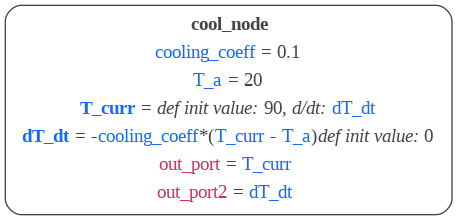

In [7]:
mod_graph.nodes.append(cool_node)
mod.to_graph_image(
        engine="dot",
        output_format="png",
        view_on_render=False,
        level=3,
        filename_root="NewtonsLawOfCooling",
        is_horizontal=True
    )

from IPython.display import Image
Image(filename="NewtonsLawOfCooling.png")

## 4. Print the structure as yaml

In [8]:
print(mod_graph.to_yaml())

cooling_process:
    nodes:
        cool_node:
            parameters:
                cooling_coeff:
                    value: 0.1
                T_a:
                    value: 20
                T_curr:
                    default_initial_value: 90
                    time_derivative: dT_dt
                dT_dt:
                    value: -cooling_coeff*(T_curr - T_a)
                    default_initial_value: 0
            output_ports:
                out_port:
                    value: T_curr
                out_port2:
                    value: dT_dt



## 5. Running the Model
We can execute the model simulation over a specified duration. This is achieved using the \`EvaluableGraph\` class from MDF's execution engine, illustrating how the temperature of the object changes over time.


Init graph: cooling_process
======   Evaluating at t = 0.0  ======
dT_dt= None
Evaluating graph: cooling_process, root nodes: ['cool_node'], with array format numpy
======   Evaluating at t = 0.1  ======
dT_dt= -7
Evaluating graph: cooling_process, root nodes: ['cool_node'], with array format numpy
======   Evaluating at t = 0.2  ======
dT_dt= -6.93
Evaluating graph: cooling_process, root nodes: ['cool_node'], with array format numpy
======   Evaluating at t = 0.3  ======
dT_dt= -6.8607000000000005
Evaluating graph: cooling_process, root nodes: ['cool_node'], with array format numpy
======   Evaluating at t = 0.4  ======
dT_dt= -6.792093
Evaluating graph: cooling_process, root nodes: ['cool_node'], with array format numpy
======   Evaluating at t = 0.5  ======
dT_dt= -6.724172070000001
Evaluating graph: cooling_process, root nodes: ['cool_node'], with array format numpy
======   Evaluating at t = 0.6  ======
dT_dt= -6.656930349300001
Evaluating graph: cooling_process, root nodes: ['co

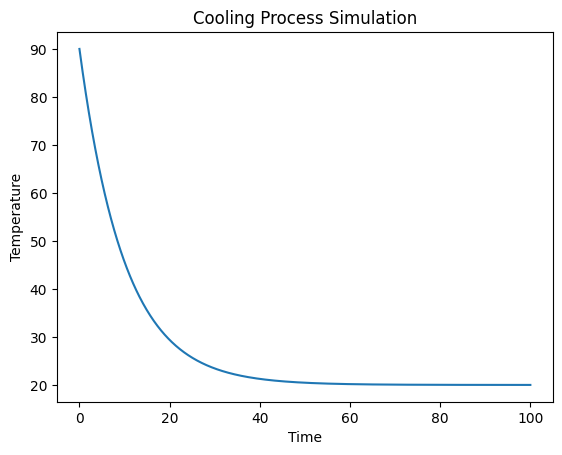

In [9]:
from modeci_mdf.utils import load_mdf, print_summary
from modeci_mdf.execution_engine import EvaluableGraph
import matplotlib.pyplot as plt

verbose = False
eg = EvaluableGraph(mod_graph, verbose=verbose)
dt = 0.1

duration = 100
t = 0
recorded = {}
times = []
s = []

# Execute the simulation
while t <= duration:
    times.append(t)
    print(f"======   Evaluating at t = {t:.1f}  ======")

    print("dT_dt=", eg.enodes["cool_node"].evaluable_outputs["out_port2"].curr_value)
    if t == 0:
        eg.evaluate()
    else:
        eg.evaluate(time_increment=dt)

    s.append(eg.enodes["cool_node"].evaluable_outputs["out_port"].curr_value)
    t += dt

# Plotting the results
plt.plot(times, s)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Cooling Process Simulation')
plt.show()


## 6. Manual Algorithm for Finding Temperature at Time $t$
For each time step from 0 to $t$:

1. Calculate the rate of temperature change $\frac{dT}{dt}$ using the formula: $-k(T - T_{\text{ambient}})$.
2. Update the temperature of the object for the next time step: $T_{\text{new}} = T + \frac{dT}{dt} \times dt$.
3. Repeat the process, using $T_{\text{new}}$ as the new $T$ for the next iteration.

### Example Calculation:

Let's manually compute the temperature at time $t$ for an object with the following parameters:

- Initial temperature $T_0 = 90$°C,
- Ambient temperature $T_{\text{ambient}} = 20$°C,
- Cooling constant $k = 0.1$,
- Time step $dt = 1$ minute,
- Calculate the temperature after $t = 3$ minutes.

Iterations:

#### Initial Condition:

- $T_0 = 90$°C

#### Iteration 1:

- $\frac{dT}{dt} = -0.1(90 - 20) = -7$°C/min
- $T_{\text{new}} = 90 + (-7) \times 1 = 83$°C

#### Iteration 2:

- $\frac{dT}{dt} = -0.1(83 - 20) = -6.3$°C/min (approximately)
- $T_{\text{new}} = 83 + (-6.3) \times 1 = 76.7$°C (approximately)

#### Iteration 3:

- $\frac{dT}{dt} = -0.1(76.7 - 20) = -5.67$°C/min (approximately)
- $T_{\text{new}} = 76.7 + (-5.67) \times 1 = 71.03$°C (approximately)

After 3 minutes, the temperature of the object is approximately 71.03°C, demonstrating how it cools towards the ambient temperature over time according to Newton's Law of Cooling. This manual method provides a simple way to estimate temperature changes over discrete time intervals.
